# Follow-Along Activity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)


In [2]:
from google.colab import files
uploaded = files.upload()

# Load data from CSV
data = pd.read_csv("13_data_random_forest.csv")
print(data.head())


Saving 13_data_random_forest.csv to 13_data_random_forest.csv
   Loan Amount  Annual Income  Debt-to-Income Ratio Credit History  \
0     23973.71       73523.55                 32.61           Poor   
1     18893.89       93188.33                 20.27           Good   
2     25181.51       27028.65                 93.17           Poor   
3     32184.24       66259.38                 48.57           Good   
4     18126.77       41987.15                 43.17           Poor   

   Credit History Encoded  Credit Risk  
0                       2            1  
1                       0            0  
2                       2            1  
3                       0            0  
4                       2            1  


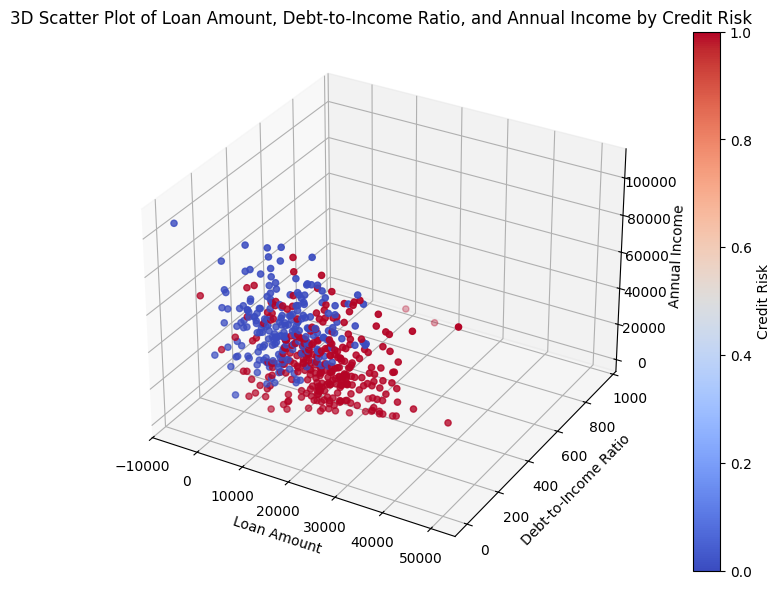

In [5]:
# Importing the 3D Plotting Module
from mpl_toolkits.mplot3d import Axes3D

# Creating a Figure and 3D Axis
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot points
scatter = ax.scatter(
    data['Loan Amount'],
    data['Debt-to-Income Ratio'],
    data['Annual Income'],
    c=data['Credit Risk'],
    cmap='coolwarm'
)

# Labels and colour bar
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Debt-to-Income Ratio')
ax.set_zlabel('Annual Income')
plt.colorbar(scatter, label='Credit Risk')
plt.title('3D Scatter Plot of Loan Amount, Debt-to-Income Ratio, and Annual Income by Credit Risk')

# Save to jpeg for textbook publication, dpi=300 , tight
plt.savefig('Figure 13.7 3D Scatter Plot of Loan Amount, Debt-to-Income Ratio, and Annual Income by Credit Risk.jpeg', dpi=300, bbox_inches='tight')

plt.show()


In [6]:
# Define features and target variables
X = data[['Loan Amount', 'Annual Income', 'Debt-to-Income Ratio', 'Credit History Encoded']]
y = data['Credit Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(max_depth=5, random_state=42)

In [8]:
# Predict credit risk on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of credit risk

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")


Accuracy: 0.85
Precision: 0.8823529411764706
Recall: 0.8333333333333334
F1 Score: 0.8571428571428571
AUC: 0.9363929146537842


In [9]:
# Define a new loan applicant (Modify these values)
new_applicant = pd.DataFrame({
    "Loan Amount": [200000],   # Try changing this
    "Annual Income": [60000], # Try changing this
    "Debt-to-Income Ratio": [200000 / 60000 * 100], # Try changing this
    "Credit History Encoded": [1]  # 0 = Good, 1 = Average, 2 = Poor
})

# Predict risk for new applicant
risk_prediction = model.predict(new_applicant)
risk_probability = model.predict_proba(new_applicant)[:, 1]

print(f"Predicted Credit Risk: {risk_prediction[0]} (1 = High Risk, 0 = Low Risk)")
print(f"Probability of High Risk: {risk_probability[0]:.2f}")


Predicted Credit Risk: 1 (1 = High Risk, 0 = Low Risk)
Probability of High Risk: 0.99


# Your Project

In [10]:
try:
    # Get user input
    loan_amount = float(input("Enter Loan Amount (£): "))
    annual_income = float(input("Enter Annual Income (£): "))

    # Compute Debt-to-Income Ratio
    debt_to_income_ratio = (loan_amount / annual_income) * 100

    # Get Credit History input as a number
    print("\nCredit History Options: 0 = Good, 1 = Average, 2 = Poor")
    credit_history_encoded = int(input("Enter Credit History (0, 1, or 2): "))

    # Validate credit history input
    if credit_history_encoded not in [0, 1, 2]:
        print("Invalid input! Please enter 0 for Good, 1 for Average, or 2 for Poor.")
    else:
        # Create a DataFrame for prediction
        new_applicant = pd.DataFrame({
            "Loan Amount": [loan_amount],
            "Annual Income": [annual_income],
            "Debt-to-Income Ratio": [debt_to_income_ratio],
            "Credit History Encoded": [credit_history_encoded]
        })

        # Make predictions
        risk_prediction = model.predict(new_applicant)
        risk_probability = model.predict_proba(new_applicant)[:, 1]

        # Display results
        print("\nCredit Risk Prediction")
        print(f"Predicted Credit Risk: {risk_prediction[0]} (1 = High Risk, 0 = Low Risk)")
        print(f"Probability of High Risk: {risk_probability[0]:.2f}")

except ValueError:
    print("Invalid input! Please enter numeric values for Loan Amount, Annual Income, and Credit History.")


Enter Loan Amount (£): 30000
Enter Annual Income (£): 70000

Credit History Options: 0 = Good, 1 = Average, 2 = Poor
Enter Credit History (0, 1, or 2): 2

Credit Risk Prediction
Predicted Credit Risk: 1 (1 = High Risk, 0 = Low Risk)
Probability of High Risk: 0.95
